---

# Draw circle on plot with mplfinance

## https://stackoverflow.com/questions/75737197/

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf

In [3]:
ls *.csv

pr451data.csv  so75737197_data.bak.csv  so75737197_data.csv  tmp.csv


In [4]:
df = pd.read_csv('so75737197_data.csv')
df.head()
df.tail()

,Index,Start Date,Open Price,High Price,Low Price,Close Price,Volume,End Date
0,0,2023-03-12 18:30:00,3.996,4.038,3.988,4.008,1216259.0,2023-03-12 18:44:59.999
1,1,2023-03-12 18:45:00,4.008,4.024,3.990,3.993,638860.0,2023-03-12 18:59:59.999
2,2,2023-03-12 19:00:00,3.993,4.024,3.992,4.019,297226.0,2023-03-12 19:14:59.999
3,3,2023-03-12 19:15:00,4.018,4.023,3.973,3.985,1101139.0,2023-03-12 19:29:59.999
4,4,2023-03-12 19:30:00,3.986,4.003,3.976,3.993,427351.0,2023-03-12 19:44:59.999


,Index,Start Date,Open Price,High Price,Low Price,Close Price,Volume,End Date
35,35,2023-03-13 03:15:00,4.418,4.435,4.393,4.432,354457.0,2023-03-13 03:29:59.999
36,36,2023-03-13 03:30:00,4.433,4.461,4.415,4.449,256813.0,2023-03-13 03:44:59.999
37,37,2023-03-13 03:45:00,4.450,4.462,4.435,4.439,226006.0,2023-03-13 03:59:59.999
38,38,2023-03-13 04:00:00,4.437,4.464,4.418,4.458,304705.0,2023-03-13 04:14:59.999
39,39,2023-03-13 04:15:00,4.459,4.465,4.436,4.439,288049.0,2023-03-13 04:29:59.999


In [5]:
df = pd.read_csv('so75737197_data.csv',
                 usecols=['Start Date','Open Price','High Price','Low Price','Close Price','Volume'],
                 index_col='Start Date',parse_dates=True)
df.shape
df.head(3)
df.tail(2)

(40, 5)

,Open Price,High Price,Low Price,Close Price,Volume
Start Date,,,,,
2023-03-12 18:30:00,3.996,4.038,3.988,4.008,1216259.0
2023-03-12 18:45:00,4.008,4.024,3.990,3.993,638860.0
2023-03-12 19:00:00,3.993,4.024,3.992,4.019,297226.0


,Open Price,High Price,Low Price,Close Price,Volume
Start Date,,,,,
2023-03-13 04:00:00,4.437,4.464,4.418,4.458,304705.0
2023-03-13 04:15:00,4.459,4.465,4.436,4.439,288049.0


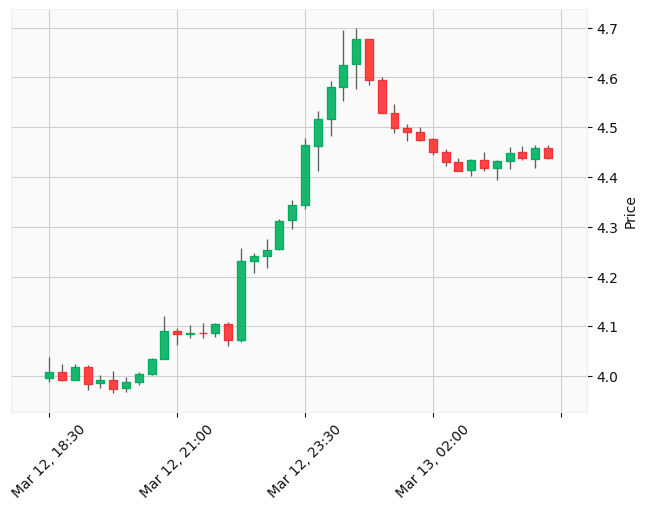

In [6]:
mpf.plot(df,style='yahoo',type='candle',columns=['Open Price','High Price','Low Price','Close Price','Volume'])

In [7]:
import pandas as pd
import matplotlib
import mplfinance as mpf
import matplotlib.pyplot as plt
import datetime

last_index_nan_value = 0
# Don't spend memory ram unnecesary pl0x
# matplotlib.use("Agg")

# def set_DateTimeIndex(df_trading_pair):
#     df_trading_pair = df_trading_pair.set_index('Start Date', inplace=False, parse_dates=True)
#     print(df_trading_pair.head())
#     # Rename the column names for best practices
#     df_trading_pair.rename(columns = { "Open Price" : 'Open',
#                                        "High Price" : 'High',
#                                        "Low Price" : 'Low',
#                                        "Close Price" :'Close',
#                               }, inplace = True)
#     return df_trading_pair

# def convert_to_unix_ms(string_date):
#     date_format = "%d %b '%y %H:%M"
#     dt = datetime.datetime.strptime(string_date, date_format)
#     unix_timestamp_ms = int(dt.timestamp() * 1000)
#     return unix_timestamp_ms

def plot_this(df):
    #global trading_pair
    #global start_date
    #global end_date
    
    #df_trading_pair_date_time_index = set_DateTimeIndex(df)
    df_trading_pair_date_time_index = df
    
    # Define periods
    k_period = 14
    d_period = 1
    smooth_window = 3
       
    stochastic = pd.DataFrame()
    stochastic['%K'] = ((df['Close Price'] - df['Low Price'].rolling(k_period).min()) \
                        / (df['High Price'].rolling(k_period).max() - df['Low Price'].rolling(k_period).min())) * 100
    stochastic['%D'] = stochastic['%K'].rolling(d_period).mean()
    stochastic['%SD'] = stochastic['%D'].rolling(smooth_window).mean()
    stochastic['UL'] = 80
    stochastic['DL'] = 20
    
    # Get the index of the last nan value in the lower bound series    
    global last_index_nan_value
    last_index_nan_value = len(stochastic['%D']) - pd.isna(stochastic['%D'])[::-1].argmax() - 1
        
    # Store the plots of the last 120 data rows of upper and lower bounds as well as the entry and exit points
    plots_to_add = {"Stochastics":mpf.make_addplot((stochastic[['%K', '%SD', 'UL', 'DL']]), 
                                                   ylim=[0, 100], panel=2, ylabel="Stochastics", 
                                                   y_on_right=False)}
    #print('stochastic=\n',stochastic[['%K', '%SD', 'UL', 'DL']])
    # Plotting
    # Create my own `marketcolors` style:
    mc = mpf.make_marketcolors(up='#0ECB81',down='#F64670',inherit=True)
    # Create my own `MatPlotFinance` style:
    s  = mpf.make_mpf_style(figcolor='#162125', facecolor= "#162125", marketcolors=mc, y_on_right=True, 
                            rc={'font.size':18, 'xtick.color': 'w'}, gridcolor='white', gridstyle='--', edgecolor='white')

    circle_data = [float('nan')]*len(df)
    circle_data[17] = stochastic.iloc[17]['%K']
    circle_data[25] = stochastic.iloc[25]['%K']
    
    ap = mpf.make_addplot(circle_data,type='scatter',markersize=1200,color="#162125",#facecolor=None,
                          alpha=0.7,edgecolors='yellow',marker='o',linewidths=6,panel=2,ylim=(0,120))
    # Plot it
    candlestick_plot, axlist = mpf.plot(df,#df_trading_pair_date_time_index,
                        columns=['Open Price','High Price','Low Price','Close Price','Volume'],
                        figsize=(20,10),
                        figratio=(12, 6),
                        panel_ratios=(5,1,1.5),
                        type="candle",
                        volume=True,
                        style=s,
                        tight_layout=True,
                        #datetime_format = '%b %d, %H:%M:%S',
                        datetime_format = '%b %d, %H:%M',
                        ylabel = "Price ($)",
                        returnfig=True,
                        show_nontrading=True,
                        warn_too_much_data=870, # Silence the Too Much Data Plot Warning by setting a value greater than the amount of rows you want to be plotted
                        addplot = list(plots_to_add.values())+[ap] # Add the stochastic plot as well as the bullish entries to the main plot
                        )
    # Add Title
#    axlist[0].set_title("APEUSDT - 15m", fontsize=60, style='italic', fontfamily='fantasy', color="white")
    axlist[0].set_title("APEUSDT - 15m", fontsize=60, style='italic', color="white")  # Use `axtitle=dict()`
    
    # Set the color of the xticks, yticks and ylabel in every axes object
    ## Main Plot (Candlesticks)
    axlist[0].tick_params(axis='y', colors='white')   # ytick.color
    axlist[0].yaxis.label.set_color('white')          # ytick.labelcolor
    ## Volume Indicator
    axlist[2].tick_params(axis='y', colors='white')
    axlist[2].yaxis.label.set_color('white')
    ## Stochastics Indicator
    axlist[4].tick_params(axis='y', colors='white')
    axlist[4].yaxis.label.set_color('white')
    
    
    # Get the Volume indicator and modify its font size
    vol_ax = plt.gcf().axes[2]
    vol_ax.yaxis.label.set_size(15)
    
    # Set the x axis label
    axlist[0].set_xlabel('Timezone UTC')
    # Find the interval between the 7 custom x-tick marks
#     time_delta = (df["Start Date"].iloc[-1]-df["Start Date"].iloc[last_index_nan_value+1])/6
#     # Set the locations of the custom x-tick marks
#     tick_locations = [df["Start Date"].iloc[last_index_nan_value+1] + i*time_delta for i in range(7)]
#     # Set the labels of the custom x-tick marks
#     tick_labels = [date.strftime("%b %d, %H:%M") for date in tick_locations]
#     # Apply the custom x-tick marks and labels
#     axlist[0].xaxis.set_ticks(tick_locations)
#     axlist[0].xaxis.set_ticklabels(tick_labels)

    # Set the y axis range 
    ymin_value = pd.concat([df["Low Price"]], axis=0).min()
    ymax_value = pd.concat([df["High Price"]], axis=0).max()
    axlist[0].set_ylim([ymin_value,ymax_value])
    # Save the plot
    random_filename = "TEST_APEUSDT"+".png"
    mpf.show()
    return stochastic[['%K', '%SD', 'UL', 'DL']]
#    candlestick_plot.savefig(random_filename,dpi=300, bbox_inches = "tight")
    
    #RELEASE THE MEMORY RAM
#    plt.close('all')

In [8]:
#df_o = pd.read_csv('so75737197_data.csv',usecols=['Start Date','Open Price','High Price','Low Price','Close Price','Volume'])
#df_o.head()

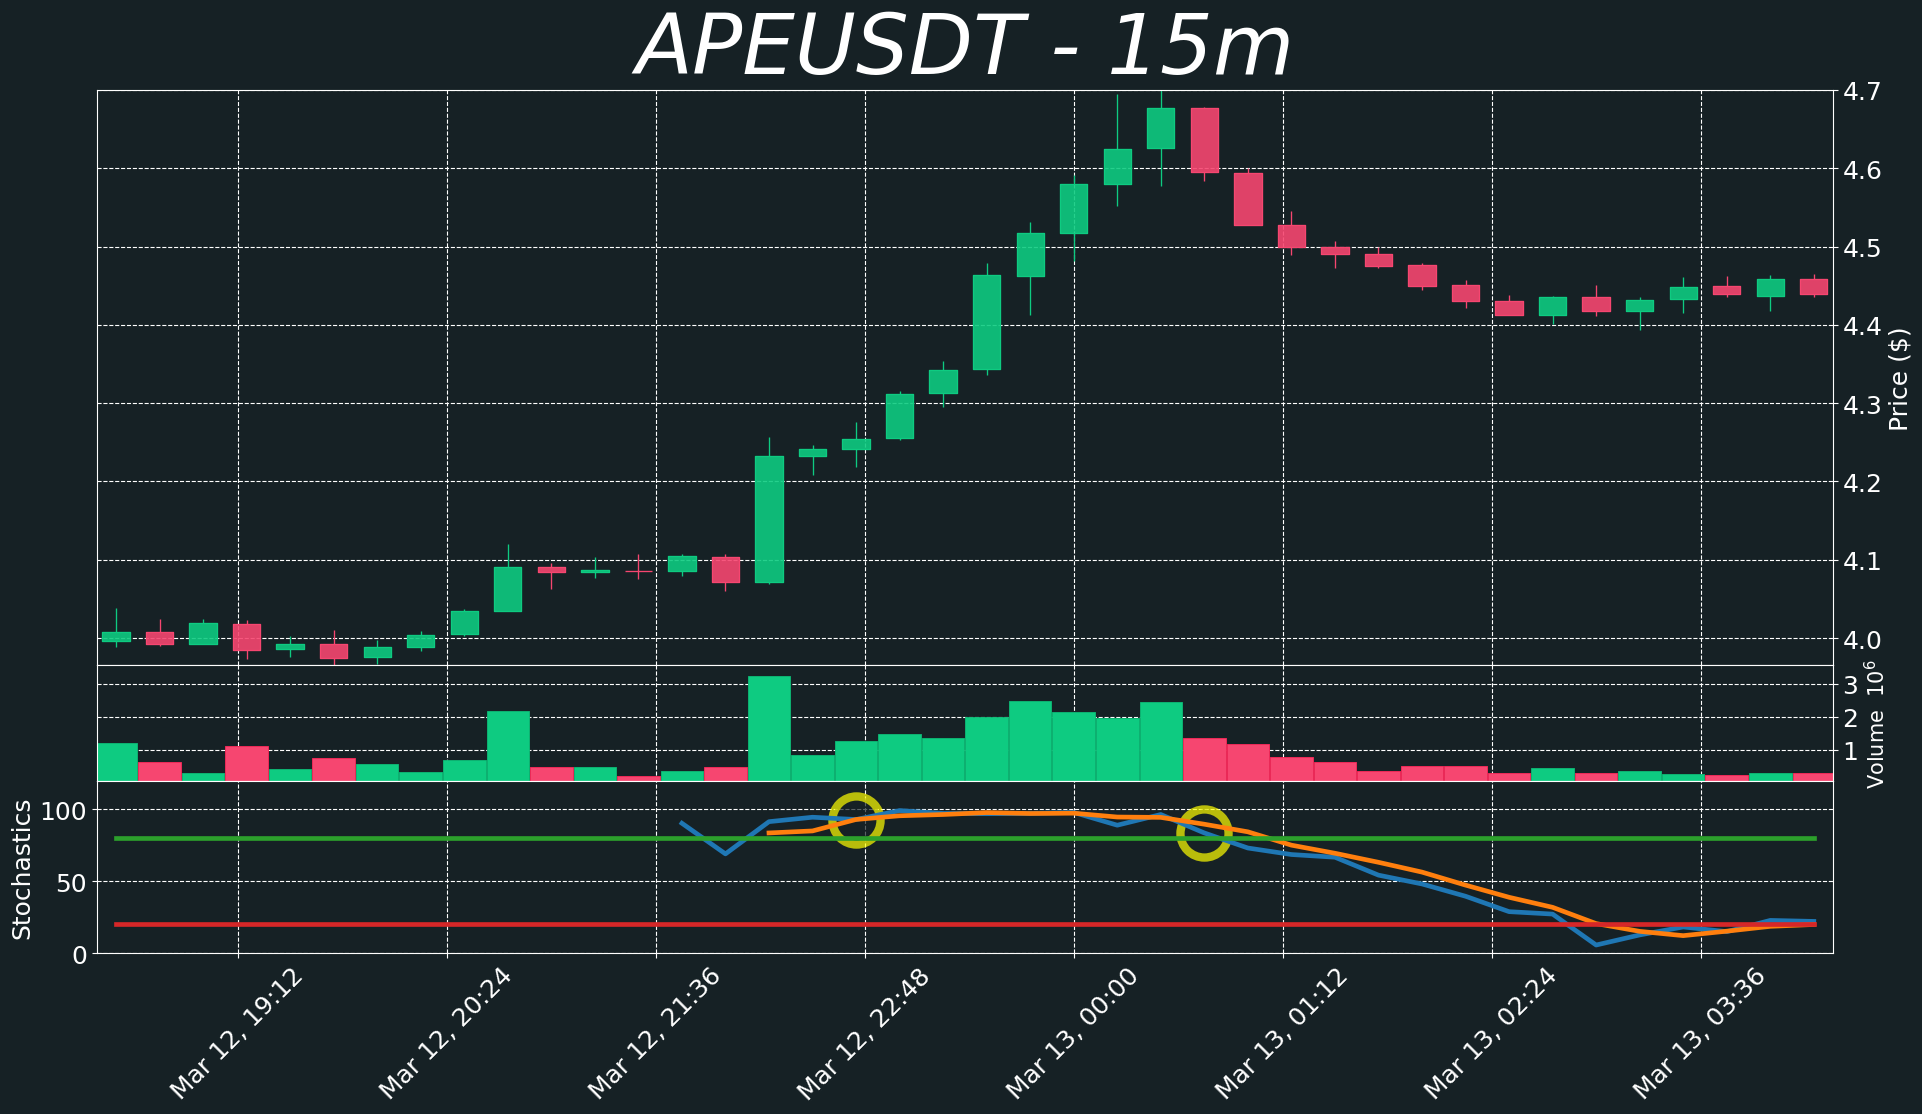

In [9]:
stoch = plot_this(df)

In [10]:
!head 'so75737197_data.csv'
df = pd.read_csv('so75737197_data.csv',
                 usecols=['Start Date','Open Price','High Price','Low Price','Close Price','Volume'],
                 index_col='Start Date',parse_dates=True)
df.shape
df.head(3)

Index,Start Date,Open Price,High Price,Low Price,Close Price,Volume,End Date
0,2023-03-12 18:30:00,3.996,4.038,3.988,4.008,1216259.0,2023-03-12 18:44:59.999
1,2023-03-12 18:45:00,4.008,4.024,3.99,3.993,638860.0,2023-03-12 18:59:59.999
2,2023-03-12 19:00:00,3.993,4.024,3.992,4.019,297226.0,2023-03-12 19:14:59.999
3,2023-03-12 19:15:00,4.018,4.023,3.973,3.985,1101139.0,2023-03-12 19:29:59.999
4,2023-03-12 19:30:00,3.986,4.003,3.976,3.993,427351.0,2023-03-12 19:44:59.999
5,2023-03-12 19:45:00,3.993,4.01,3.965,3.975,750141.0,2023-03-12 19:59:59.999
6,2023-03-12 20:00:00,3.976,3.998,3.967,3.988,552681.0,2023-03-12 20:14:59.999
7,2023-03-12 20:15:00,3.989,4.009,3.983,4.004,322794.0,2023-03-12 20:29:59.999
8,2023-03-12 20:30:00,4.005,4.037,4.003,4.035,682787.0,2023-03-12 20:44:59.999


(40, 5)

,Open Price,High Price,Low Price,Close Price,Volume
Start Date,,,,,
2023-03-12 18:30:00,3.996,4.038,3.988,4.008,1216259.0
2023-03-12 18:45:00,4.008,4.024,3.990,3.993,638860.0
2023-03-12 19:00:00,3.993,4.024,3.992,4.019,297226.0


In [11]:
k_period = 14
d_period = 1
smooth_window = 3

stochastic = pd.DataFrame()
stochastic['%K'] = ((df['Close Price'] - df['Low Price'].rolling(k_period).min()) \
                    / (df['High Price'].rolling(k_period).max() - df['Low Price'].rolling(k_period).min())) * 100
stochastic['%D'] = stochastic['%K'].rolling(d_period).mean()
stochastic['%SD'] = stochastic['%D'].rolling(smooth_window).mean()
stochastic['UL'] = 80
stochastic['DL'] = 20

In [12]:
# Create my own `marketcolors` style:
mc = mpf.make_marketcolors(up='#0ECB81',down='#F64670',inherit=True)
# Create my own `MatPlotFinance` style:
s  = mpf.make_mpf_style(figcolor='#162125', facecolor= "#162125", marketcolors=mc, y_on_right=True, 
                        rc={'font.size':18, 'xtick.color': 'w', 
                            'axes.labelsize': 12,
                            'ytick.color': 'w', 'ytick.labelcolor': 'w', 'axes.labelcolor':'w'}, 
                        gridcolor='white', gridstyle='--', edgecolor='white')

In [13]:
def get_stochastic_indicator_purple(df, stochastic):
    # Add logic here to determine where the purple circles should be.

    # For now, for demonstration purposes, 
    # we are just hard-coding the 17th position:

    # We are going to display the circles using mpf.make_addplot(type='scatter')
    # With scatter plots, we want data where we want the circles to appear,
    # and NAN values in all other locations:
    circles = [float('nan')]*len(df)
    circles[17] = stochastic.iloc[17]['%K']
    return circles

def get_stochastic_indicator_red(df, stochastic):
    # Add logic here to determine where the red circles should be.

    # For now, for demonstration purposes, 
    # we are just hard-coding the 25th position:

    # We are going to display the circles using mpf.make_addplot(type='scatter')
    # With scatter plots, we want data where we want the circles to appear,
    # and NAN values in all other locations:
    circles = [float('nan')]*len(df)
    circles[25] = stochastic.iloc[25]['%K']
    return circles

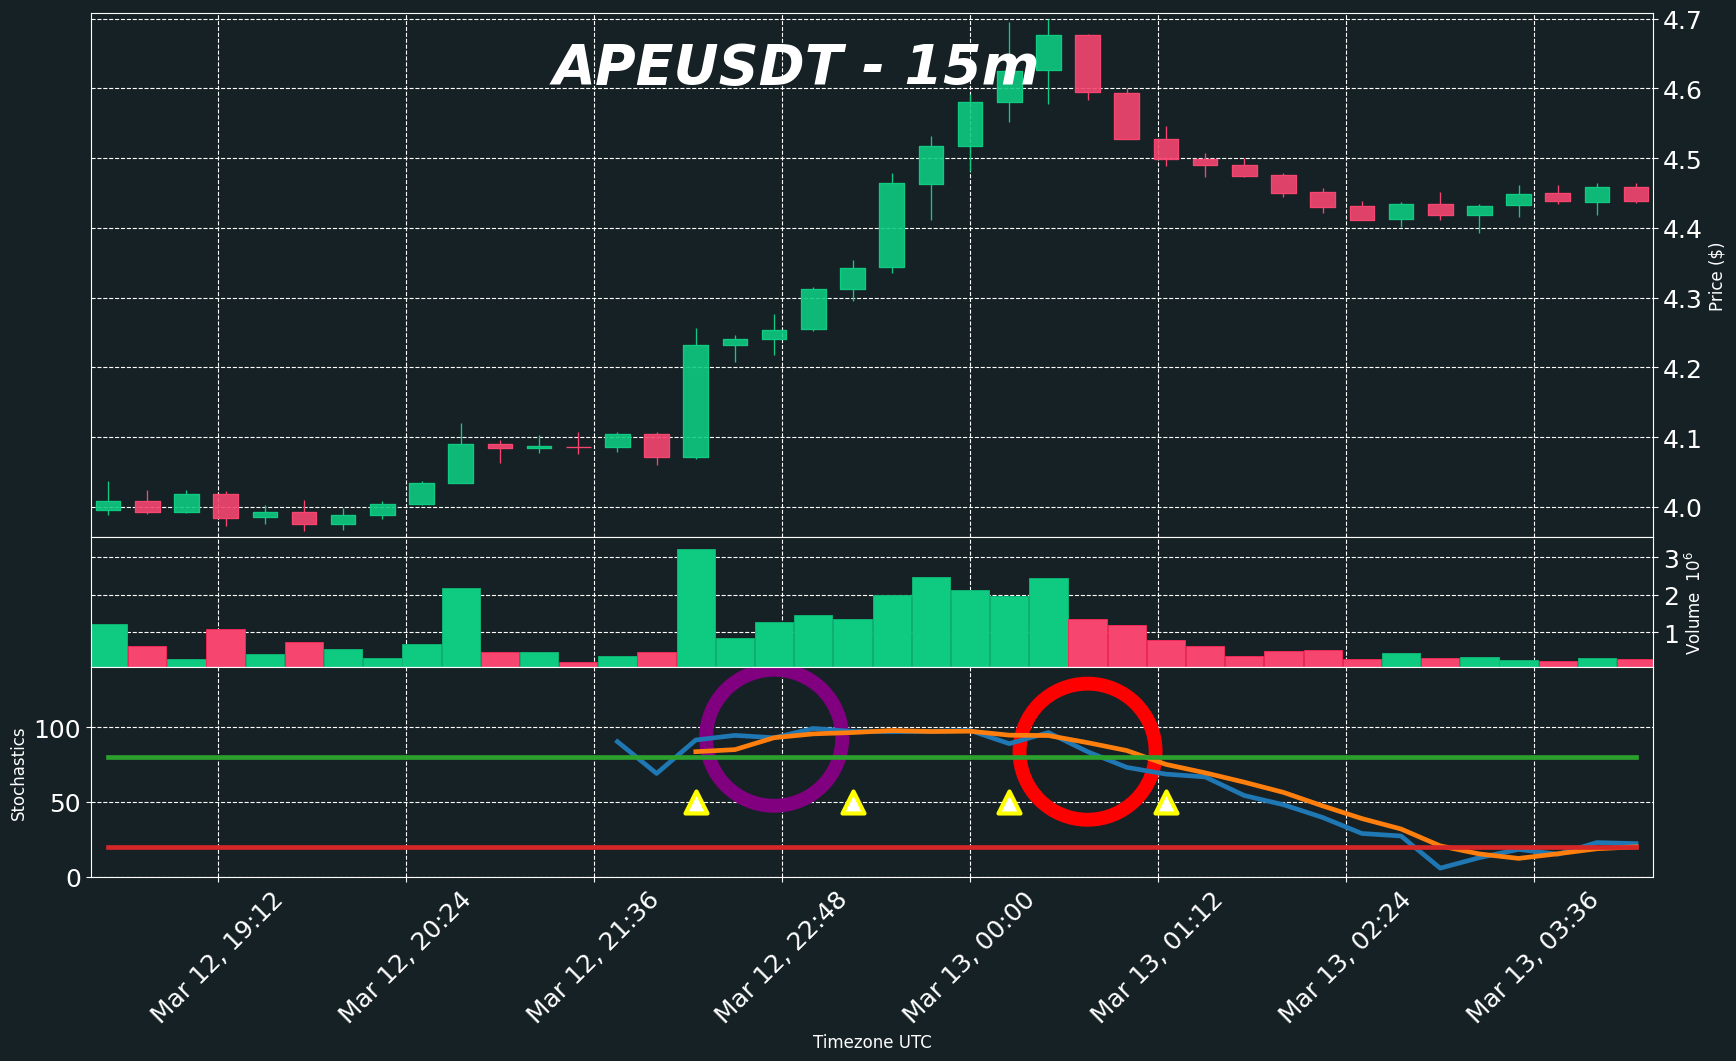

In [18]:
purple_circles = get_stochastic_indicator_purple(df, stochastic)
red_circles    = get_stochastic_indicator_red(df, stochastic)


# Store the plots of the last 120 data rows of upper and lower bounds as well as the entry and exit points
# Raising ylim to 120 so there is room for the circles that may be in the upper 90's close to 100:
range_markers = [float('nan')]*len(df)
range_markers[15] = 50
range_markers[19] = 50
range_markers[23] = 50
range_markers[27] = 50

# from matplotlib import colors as mcolors
# cp = mcolors.to_rgba('purple',0.25)
# print('cp=',cp)
# cr = mcolors.to_rgba('red',0.25)
# print('cr=',cr)

ylimits = (-10,140)
plots_to_add = {"Stochastics":mpf.make_addplot((stochastic[['%K', '%SD', 'UL', 'DL']]), 
                                               ylim=ylimits, panel=2, ylabel="Stochastics", 
                                               y_on_right=False),
                # Notice, we make the marker color the same as the plot face color, so the marker appears see-though;
                #         then we set the marker edge colors to the color we want to see:
               "Purple_Cicles":mpf.make_addplot(purple_circles,type='scatter',markersize=9600,color='None',#"#162125",
                                                edgecolors='purple',marker='o',linewidths=10,panel=2,ylim=ylimits),
                                                #edgecolors=cp,marker='o',linewidths=7,panel=2,ylim=ylimits),
               "Red_Cicles":   mpf.make_addplot(red_circles,type='scatter',markersize=9600,color='None',#None,#"#162125",
                                                edgecolors='red'   ,marker='o',linewidths=10,panel=2,ylim=ylimits),
                                                #edgecolors=cr   ,marker='o',linewidths=7,panel=2,ylim=ylimits),
               "RangeMarkers": mpf.make_addplot(range_markers,type='scatter',markersize=250,color="w",
                                                edgecolors='yellow',marker='^',linewidths=3,panel=2,ylim=(0,140))

               }

#ap = list(plots_to_add.values())

#Plot it
mpf.plot(df,columns=['Open Price','High Price','Low Price','Close Price','Volume'],
         figsize=(18,10),panel_ratios=(5,1.25,2),type="candle",volume=True,style=s,
         tight_layout=True,datetime_format = '%b %d, %H:%M',ylabel = "Price ($)",
         show_nontrading=True,warn_too_much_data=870, # Silence the Too Much Data Warning
         addplot = list(plots_to_add.values()), # Add the stochastic plot as well as the bullish entries to the main plot
         title=dict(title="APEUSDT - 15m", fontsize=40, style='italic', weight='bold', color="white"),
         xlabel='Timezone UTC',
         #savefig='apeusdt.png'
        )

In [15]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

In [ ]:
stoch.iloc[10:]

In [ ]:
stoch.iloc[17]
stoch.iloc[17]['%K']
df.iloc[17]

In [ ]:
purple_circle_ix = 17
red_circle_ix = 25
stoch.iloc[25]
stoch.iloc[25]['%K']
df.iloc[25]

In [ ]:
circle_data = [float('nan')]*len(df)
circle_data[17] = stoch.iloc[17]['%K']
circle_data[25] = stoch.iloc[25]['%K']

In [ ]:
# Evaluate if there's a pattern
previous_signal = "None"
bearish_indices = []
bearish_entries = []
for i in range(last_index_nan_value+1,len(df)-3):
    slice_df = df.iloc[i:i+4]    
    if (slice_df["Volume"].max() > df["Volume"][slice_df.index[0]-8:slice_df.index[0]]).all():
        start = slice_df.index[0]
        end = slice_df.index[-1]
        # First BEARISH signal
        all_stochastics_up = stochastic.loc[start:end][["%D", "%SD"]].ge(stochastic.loc[start:end]["UL"], axis=0).all(axis=1)                
        all_stochastics_down = stochastic.loc[start:end][["%D", "%SD"]].le(stochastic.loc[start:end]["DL"], axis=0).all(axis=1)
        if all_stochastics_up.sum() >= 2 and previous_signal == "None":

            previous_signal = "bearish"
            bearish_indices.append(stochastic.loc[start:end].index.values.tolist())

    # SHORT ENTRY signal
    if previous_signal == "bearish":
        if df["Start Date"].loc[bearish_indices[-1][-1]] < slice_df["Start Date"].iat[0]:           
            if ((slice_df[:2]["Close Price"] > slice_df[:2]["Open Price"]).all() and (slice_df[-2:]["Close Price"] < slice_df[-2:]["Open Price"]).all()).all():
                start = slice_df.index[0]
                end = slice_df.index[-1]

                previous_signal = "None"
                bearish_entries.append(stochastic.loc[start:end].index.values.tolist())


In [ ]:
#  mvals are the markers, i.e. in this case: 'o'
#  cvals are the colors.
# _ = _mscatter(xvals,plot_yvals,ax,mvals,s=marker_size,c=cvals,linewidths=lwids,edgecolors=evals)